In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=0, n_classes=3, random_state=42)
df = pd.DataFrame(X, columns=['Feature_'+str(i) for i in range(1, 16)])
df['Target'] = y

# Let's say Feature_1, Feature_2 are categorical, Feature_3 is ordinal and Feature_4, Feature_5 are continuous.
# We'll convert these features to the appropriate format

# Convert numeric to categorical for Feature_1 and Feature_2
df['Feature_1'] = pd.cut(df['Feature_1'], bins=3, labels=["L", "M", "T"])
df['Feature_2'] = pd.cut(df['Feature_2'], bins=4, labels=["J", "G", "A", "R"])

# Convert numeric to ordinal for Feature_3
df['Feature_3'] = pd.cut(df['Feature_3'], bins=3, labels=["Small", "Medium", "Large"])

# For binary variables, let's create a new feature
df['Feature_6'] = np.random.randint(2, size=1000)

df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Target
0,M,A,Medium,-1.293722,-0.996752,0,-0.478898,0.396077,-0.387151,-1.507765,-0.587529,0.776801,-1.444923,-0.142421,-1.927482,0
1,M,G,Medium,0.179166,-0.561118,0,-0.633035,-1.504970,-2.558876,-0.941631,3.174288,0.055015,1.056662,-1.250089,0.440922,2
2,M,A,Small,0.048750,1.329072,1,0.349098,-1.441617,-1.640094,-0.802032,1.251448,-0.096306,-0.500039,-1.312424,-0.635632,0
3,M,G,Medium,-1.352276,-0.958022,1,0.585071,-0.156783,-1.723850,-1.744796,-2.454533,1.970374,0.611620,-0.051529,-0.623951,2
4,M,G,Medium,-0.121360,-0.563929,1,0.465592,-1.549779,-0.218608,-0.738223,-0.643419,-1.898503,-1.125049,0.446641,0.772748,1


In [ ]:
# Standardize continuous variables: Feature_4, Feature_5, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14 and Feature_15

scaler = StandardScaler()
df[['Feature_4', 'Feature_5', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15']] = scaler.fit_transform(df[['Feature_4', 'Feature_5', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15']])

# OneHot Encoding for categorical variables: Feature_1 and Feature_2
ohe = OneHotEncoder(drop='first')
feature_1_2_ohe = ohe.fit_transform(df[['Feature_1', 'Feature_2']]).toarray()
feature_1_2_df = pd.DataFrame(feature_1_2_ohe, columns = ["Feature1_"+str(int(i)) for i in range(feature_1_2_ohe.shape[1])])

# Merge with main df
df = pd.concat([df, feature_1_2_df], axis=1)

# Drop original Feature_1 and Feature_2
df = df.drop(['Feature_1', 'Feature_2'], axis=1)

# Ordinal Encoding for ordinal variable: Feature_3
ordinal = OrdinalEncoder(categories=[["Small", "Medium", "Large"]])
df['Feature_3'] = ordinal.fit_transform(df[['Feature_3']])

# Label Encoding for binary variable: Feature_6
le = LabelEncoder()
df['Feature_6'] = le.fit_transform(df['Feature_6'])

df.head()


,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Target,Feature1_0,Feature1_1,Feature1_2,Feature1_3,Feature1_4
0,1.0,-1.253916,-0.962846,0,-0.428693,0.695839,-0.386554,-0.715891,-0.540805,0.514685,-1.356855,-0.149660,-2.000885,0,1.0,0.0,0.0,0.0,0.0
1,1.0,-0.321198,-0.537324,0,-0.580581,-0.579861,-2.507619,-0.379890,1.752980,0.031340,1.049493,-1.257217,0.462852,2,1.0,0.0,1.0,0.0,0.0
2,0.0,-0.403785,1.308993,1,0.387219,-0.537347,-1.610269,-0.297038,0.580519,-0.069993,-0.447944,-1.319546,-0.657035,0,1.0,0.0,0.0,0.0,0.0
3,1.0,-1.290996,-0.925015,1,0.619748,0.324841,-1.692072,-0.856570,-1.679220,1.313964,0.621394,-0.058778,-0.644885,2,1.0,0.0,1.0,0.0,0.0
4,1.0,-0.511509,-0.540070,1,0.502013,-0.609930,-0.221943,-0.259167,-0.574885,-1.276837,-1.049159,0.439342,0.808035,1,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.metrics import classification_report

# Split the data into training and test sets
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Apply K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Print classification report for Logistic Regression
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Print classification report for K-Nearest Neighbors
print("Classification report for K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79        56
           1       0.72      0.70      0.71        70
           2       0.70      0.64      0.67        74

    accuracy                           0.72       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.72      0.72      0.72       200

Classification report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75        56
           1       0.76      0.73      0.74        70
           2       0.74      0.61      0.67        74

    accuracy                           0.72       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.73      0.72      0.72       200



Classification report for Logistic Regresion:

Precisión: Cuando el algoritmo predijo que era 0 lo hizo bien el 74% de las veces, para 1 el 72% y para 2 el 70%.

Recall: Del total de los datos reales, el algoritmo predijo bien el 86% de los 0, el 70% de los 1 y el 64% de los 2.

Accuracy=0.72; es decir que de todas las predicciones que se realizaron, el 72% fueron acertadas.

Classification report for K-Nearest Neighbors:

Precisión: Cuando el algoritmo predijo que era 0 lo hizo bien el 67% de las veces, para 1 el 76% y para 2 el 74%.

Recall: Del total de los datos reales, el algoritmo predijo bien el 86% de los 0, el 73% de los 1 y el 61% de los 2.

Accuracy=0.72; es decir que de todas las predicciones que se realizaron, el 72% fueron acertadas.

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Apply Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Apply Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Print classification report for Decision Tree
print("Classification report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Print classification report for Support Vector Machines
print("Classification report for Support Vector Machines:\n", classification_report(y_test, y_pred_svc))

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78        56
           1       0.76      0.74      0.75        70
           2       0.72      0.57      0.64        74

    accuracy                           0.73       200
   macro avg       0.73      0.74      0.72       200
weighted avg       0.73      0.72      0.72       200

Classification report for Support Vector Machines:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        56
           1       0.81      0.81      0.81        70
           2       0.85      0.78      0.82        74

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.84      0.84      0.84       200



Classification report for Decision Tree:

Precisión: Cuando el algoritmo predijo que era 0 lo hizo bien el 69% de las veces, para 1 el 76% y para 2 el 72%.


Recall: Del total de los datos reales, el algoritmo predijo bien el 91% de los 0, el 74% de los 1 y el 57% de los 2.


Accuracy=0.73; es decir que de todas las predicciones que se realizaron, el 73% fueron acertadas.

Classification report for Support Vector Machines:

Precisión: Cuando el algoritmo predijo que era 0 lo hizo bien el 85% de las veces, para 1 el 81% y para 2 el 85%.


Recall: Del total de los datos reales, el algoritmo predijo bien el 95% de los 0, el 81% de los 1 y el 78% de los 2.


Accuracy=0.84; es decir que de todas las predicciones que se realizaron, el 84% fueron acertadas.

In [ ]:
# Importing necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on the test set
y_pred_lda = lda.predict(X_test)

# Apply Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Print classification report for Linear Discriminant Analysis
print("Classification report for Linear Discriminant Analysis:\n", classification_report(y_test, y_pred_lda))

# Print classification report for Naive Bayes
print("Classification report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Classification report for Linear Discriminant Analysis:
               precision    recall  f1-score   support

           0       0.69      0.86      0.76        56
           1       0.75      0.67      0.71        70
           2       0.64      0.58      0.61        74

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.69      0.69      0.69       200

Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        56
           1       0.81      0.69      0.74        70
           2       0.68      0.68      0.68        74

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.71      0.72       200



Classification report for Linear Discriminant Analysis:

Precisión: Cuando el algoritmo predijo que era 0 lo hizo bien el 69% de las veces, para 1 el 75% y para 2 el 64%.


Recall: Del total de los datos reales, el algoritmo predijo bien el 86% de los 0, el 67% de los 1 y el 58% de los 2.


Accuracy=0.69; es decir que de todas las predicciones que se realizaron, el 69% fueron acertadas.

Classification report for Naive Bayes:

Precisión: Cuando el algoritmo predijo que era 0 lo hizo bien el 67% de las veces, para 1 el 81% y para 2 el 68%.


Recall: Del total de los datos reales, el algoritmo predijo bien el 80% de los 0, el 69% de los 1 y el 68% de los 2.


Accuracy=0.71; es decir que de todas las predicciones que se realizaron, el 71% fueron acertadas.

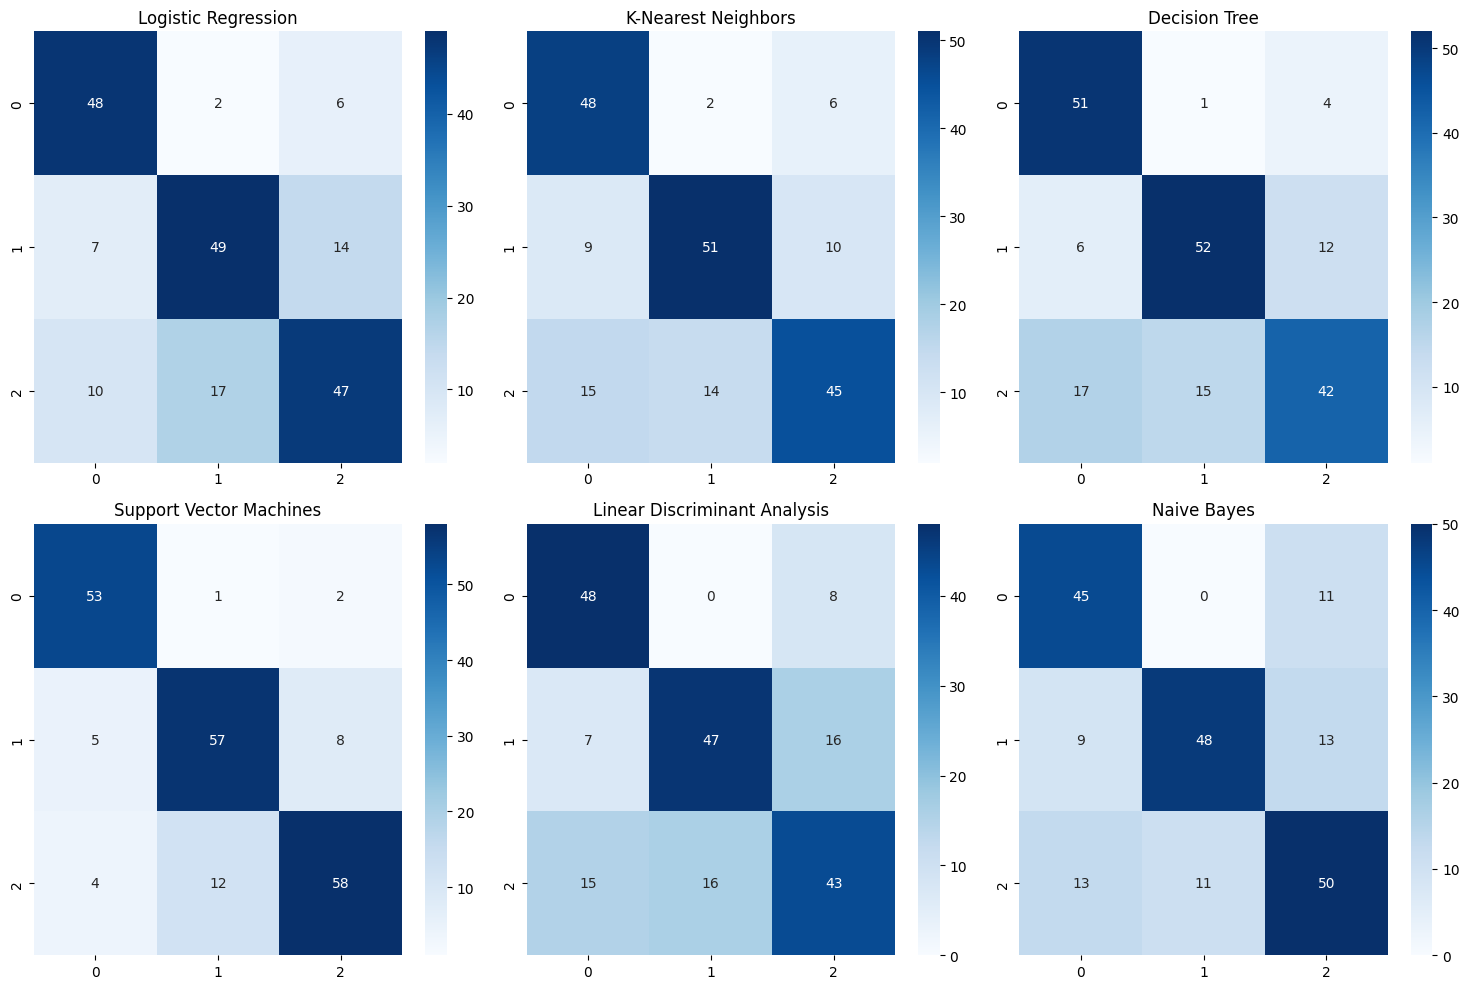

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for each model
models = {'Logistic Regression': y_pred_lr,
          'K-Nearest Neighbors': y_pred_knn,
          'Decision Tree': y_pred_dt,
          'Support Vector Machines': y_pred_svc,
          'Linear Discriminant Analysis': y_pred_lda,
          'Naive Bayes': y_pred_nb}

plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    cf_matrix = confusion_matrix(y_test, model)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(name)

plt.tight_layout()
plt.show()

CONCLUSION:

Resulta conveniente utilizar el algoritmo de clasificación de Support Vector Machines debido a que posee un Accuracy más alto de 0.84, que es el más cercano al valor 1. Es decir que en base al total de predicciones que va a realizar, el 84% de ellas serán correctas.